*Notebook created by Enric Millán Iglesias for the Bachelor's Thesis (TFG) at BSC (2025).*

**Note:** Upload the ```parameter_tuning_LSTM.csv``` file before running

# Hyperparameter Tuning for LSTM

Tuning was performed on region 11 using the years 2014, 2013, 2012, 2011 for training, 2010 for validation, and 2009 for testing. The year 2009 is used here to evaluate performance metrics for hyperparameter tuning.

## Loading experiment logs

In [7]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv('parameter_tuning_LSTM.csv')

# Display the shape and first few rows
print(f"Loaded {df.shape[0]} rows and {df.shape[1]} columns")
df.head()

Loaded 108 rows and 57 columns


,timestamp,model_name,model_path,region,start_year,end_year,train_years,test_years,model_type,cell_type,...,mae_clipped,r2_clipped,mse_corrected,rmse_corrected,mae_corrected,r2_corrected,bias_correction,train_losses,val_losses,training_curve_path
0,20250506_070921,BackwardLAIPredictor,/gpfs/scratch/bsc32/ai4land/saved_data/Backwar...,W011,2009,2014,2010-2011-2012-2013-2014,2009,rnn,lstm,...,0.16613,0.98240,0.09314,0.30519,0.17146,0.98279,0.04716,"1.14347,0.09550,0.09030,0.08827,0.08697,0.0857...","0.10738,0.09807,0.09208,0.09080,0.09069,0.0905...",/gpfs/scratch/bsc32/ai4land/saved_data/trainin...
1,20250506_070915,BackwardLAIPredictor,/gpfs/scratch/bsc32/ai4land/saved_data/Backwar...,W011,2009,2014,2010-2011-2012-2013-2014,2009,rnn,lstm,...,0.17880,0.98082,0.09719,0.31175,0.17872,0.98203,0.08504,"3.11028,0.11466,0.10224,0.09822,0.09616,0.0946...","0.13008,0.10406,0.10084,0.09806,0.09717,0.0968...",/gpfs/scratch/bsc32/ai4land/saved_data/trainin...
2,20250506_070921,BackwardLAIPredictor,/gpfs/scratch/bsc32/ai4land/saved_data/Backwar...,W011,2009,2014,2010-2011-2012-2013-2014,2009,rnn,lstm,...,0.16891,0.98164,0.09626,0.31026,0.17578,0.98221,0.05768,"1.18744,0.09624,0.09139,0.08888,0.08725,0.0859...","0.10837,0.09752,0.09462,0.09410,0.09386,0.0915...",/gpfs/scratch/bsc32/ai4land/saved_data/trainin...
3,20250506_071016,BackwardLAIPredictor,/gpfs/scratch/bsc32/ai4land/saved_data/Backwar...,W011,2009,2014,2010-2011-2012-2013-2014,2009,rnn,lstm,...,0.16996,0.98138,0.09631,0.31035,0.17564,0.98218,0.06641,"1.44031,0.09617,0.09095,0.08904,0.08764,0.0864...","0.10711,0.09557,0.09632,0.09293,0.09473,0.0935...",/gpfs/scratch/bsc32/ai4land/saved_data/trainin...
4,20250506_070934,BackwardLAIPredictor,/gpfs/scratch/bsc32/ai4land/saved_data/Backwar...,W011,2009,2014,2010-2011-2012-2013-2014,2009,rnn,lstm,...,0.17079,0.98226,0.09343,0.30567,0.17451,0.98274,0.05374,"1.57485,0.35134,0.32711,0.30395,0.27553,0.2425...","0.11127,0.10304,0.10187,0.09658,0.09651,0.0945...",/gpfs/scratch/bsc32/ai4land/saved_data/trainin...


## Average performance by metrics and hyperparameters

In [8]:
# Filter relevant columns
relevant_columns = ['dropout', 'weight_decay', 'hidden_size', 'mae', 'rmse', 'mse', 'r2']
df_filtered = df[relevant_columns].copy()

# Group by configuration and compute mean metrics
df_grouped = df_filtered.groupby(['dropout', 'weight_decay', 'hidden_size']).mean().reset_index()


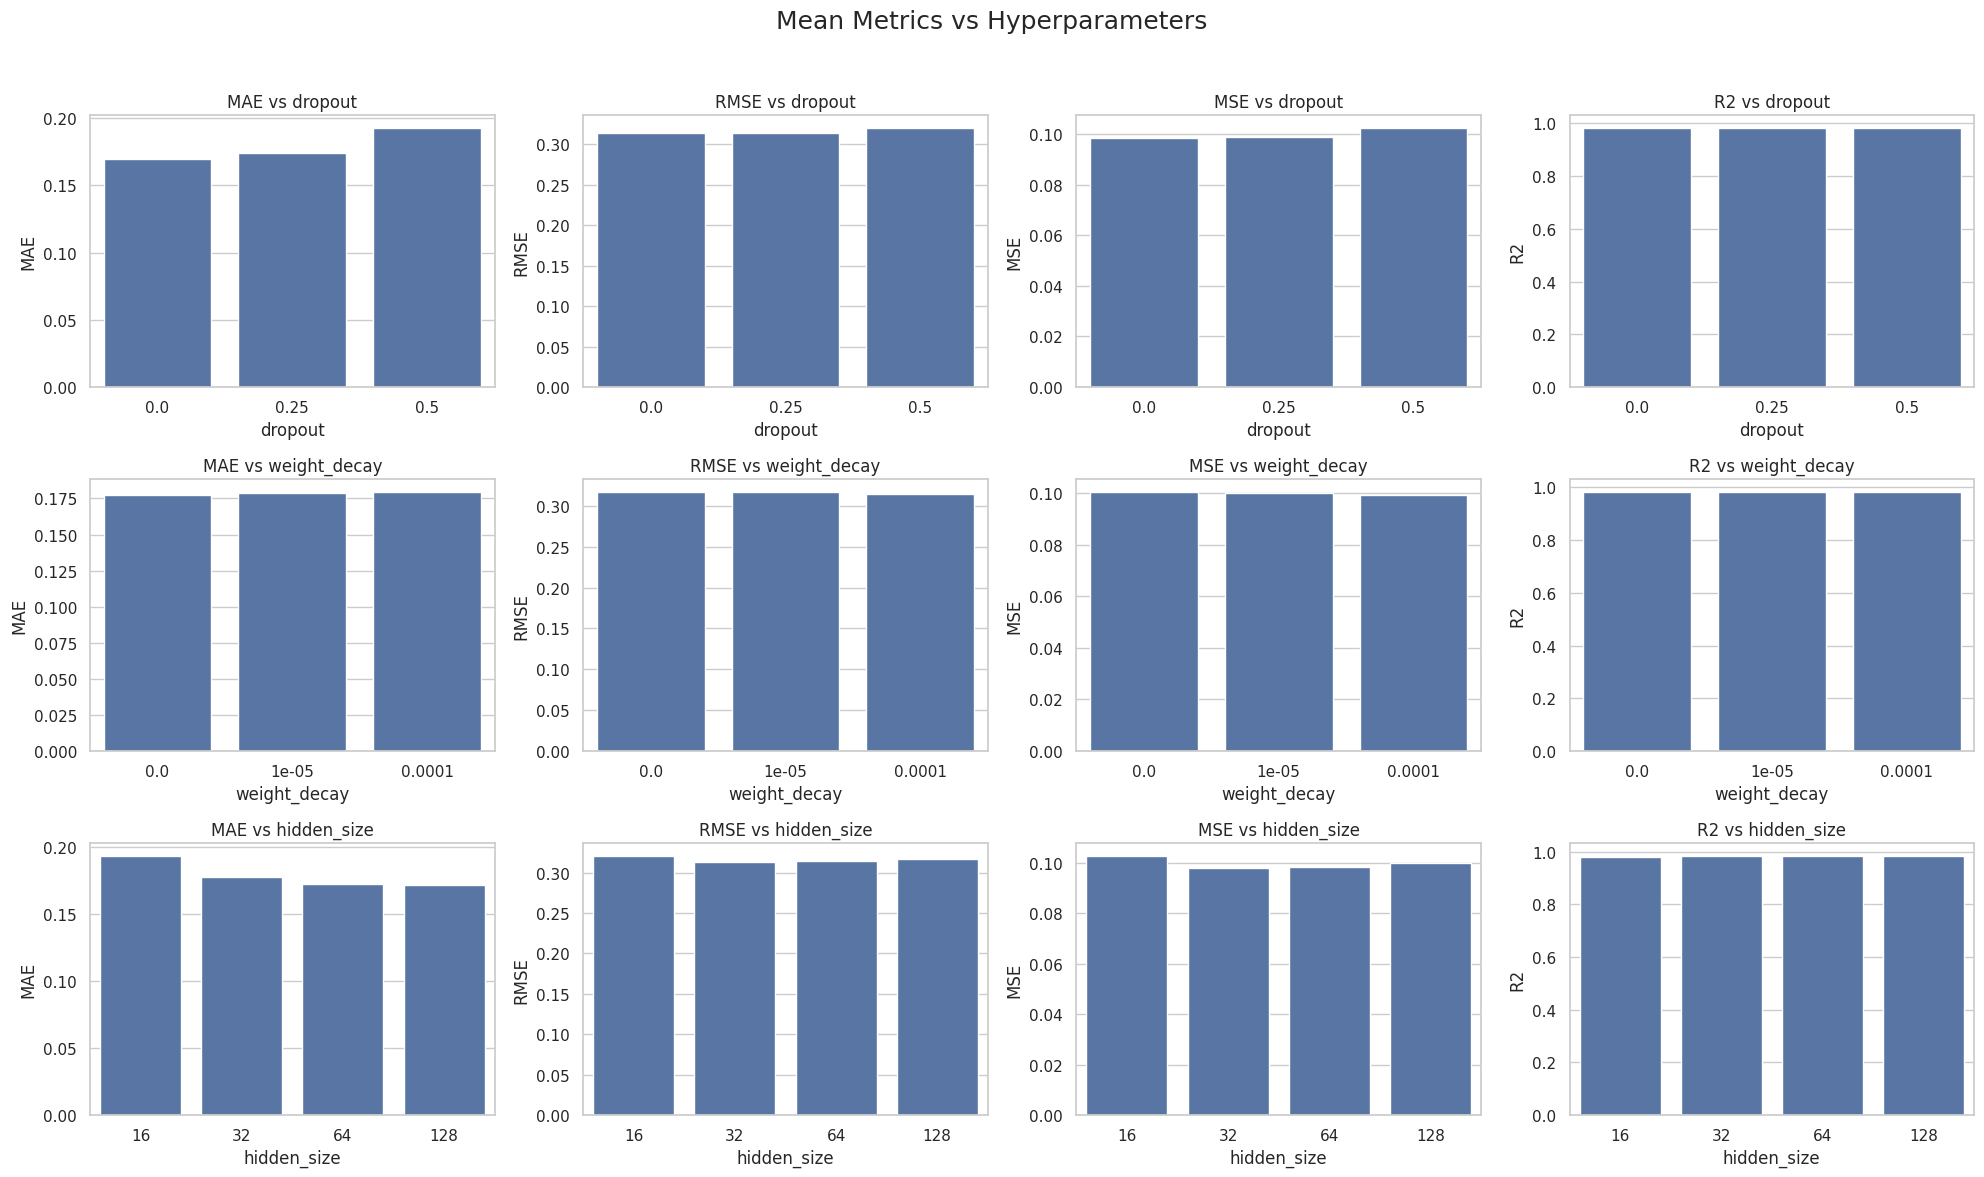

In [9]:
# Set plot style
sns.set(style="whitegrid")

# Define metrics and hyperparameters
metrics = ['mae', 'rmse', 'mse', 'r2']
hyperparams = ['dropout', 'weight_decay', 'hidden_size']

# Create a 3x4 grid: rows = hyperparameters, columns = metrics
fig, axes = plt.subplots(len(hyperparams), len(metrics), figsize=(20, 12))

for i, param in enumerate(hyperparams):
    for j, metric in enumerate(metrics):
        ax = axes[i, j]
        sns.barplot(data=df_grouped, x=param, y=metric, errorbar=None, ax=ax)
        ax.set_title(f'{metric.upper()} vs {param}')
        ax.set_xlabel(param)
        ax.set_ylabel(metric.upper())

plt.suptitle('Mean Metrics vs Hyperparameters', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

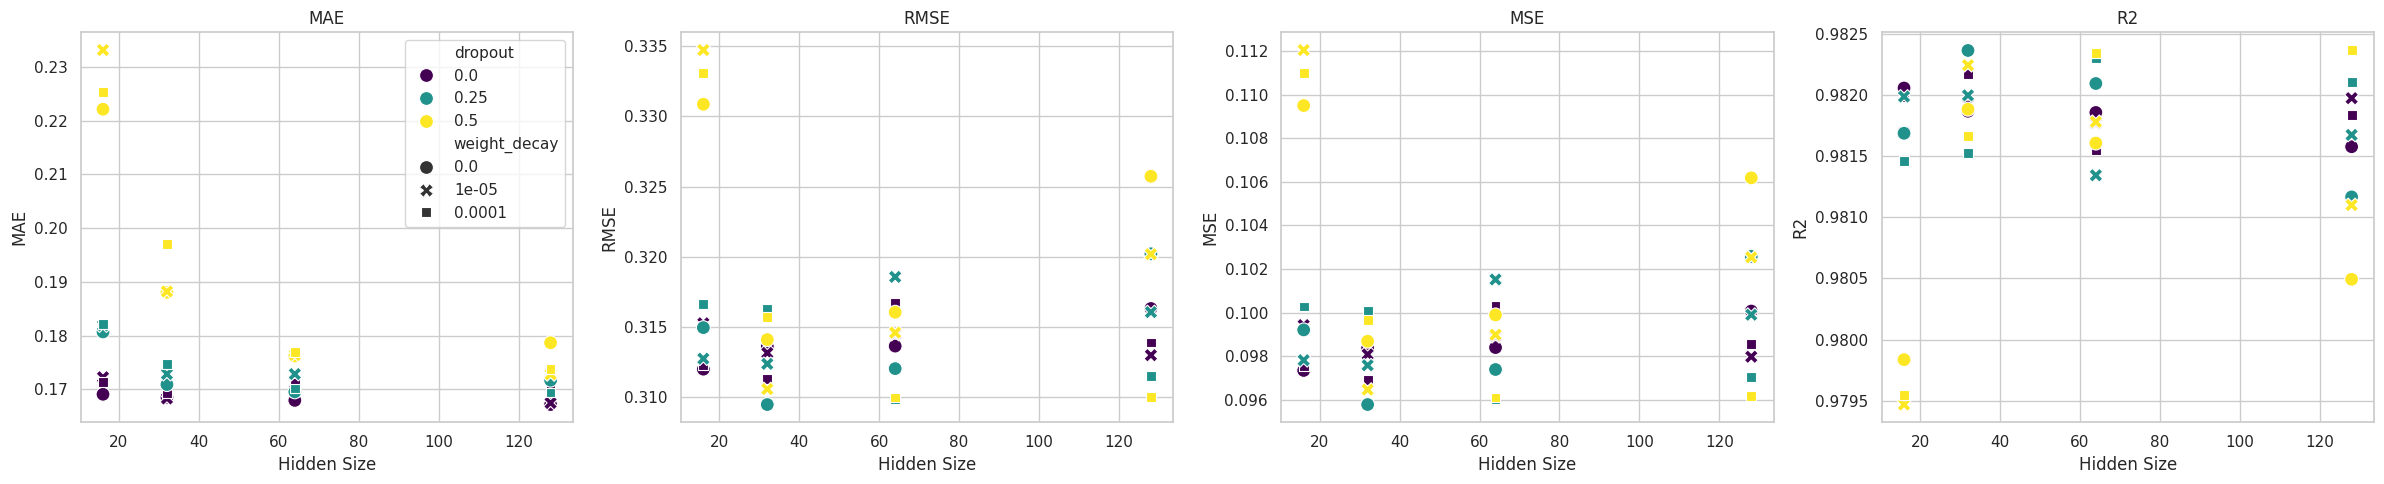

In [10]:
sns.set(style="whitegrid")

# Create one row with four scatterplots (one per metric)
fig, axes = plt.subplots(1, len(metrics), figsize=(24, 5))

for i, metric in enumerate(metrics):
    ax = axes[i]
    scatter = sns.scatterplot(
        data=df_grouped,
        x='hidden_size',
        y=metric,
        hue='dropout',
        style='weight_decay',
        palette='viridis',
        s=100,
        ax=ax,
        legend=(i == 0)  # Only show legend in the first subplot
    )
    ax.set_title(f'{metric.upper()}')
    ax.set_xlabel('Hidden Size')
    ax.set_ylabel(metric.upper())

plt.tight_layout()
plt.show()

## Best configurations (averaged and individual)

In [11]:
for metric in metrics:
    print(f"\nTop 3 Configurations by {metric.upper()}:")

    # Sort ascending for all except R² (which is better when higher)
    ascending = False if metric == 'r2' else True

    top_configs = df_grouped.sort_values(by=metric, ascending=ascending).head(3)
    display_columns = ['dropout', 'weight_decay', 'hidden_size', 'mae', 'rmse', 'mse', 'r2']
    display(top_configs[display_columns])


Top 3 Configurations by MAE:


,dropout,weight_decay,hidden_size,mae,rmse,mse,r2
3,0.0,0.00000,128,0.167193,0.316327,0.100073,0.981577
7,0.0,0.00001,128,0.167483,0.313000,0.097977,0.981973
2,0.0,0.00000,64,0.167963,0.313647,0.098397,0.981857



Top 3 Configurations by RMSE:


,dropout,weight_decay,hidden_size,mae,rmse,mse,r2
13,0.25,0.0000,32,0.170910,0.309487,0.095783,0.982363
22,0.25,0.0001,64,0.170163,0.309890,0.096043,0.982303
34,0.50,0.0001,64,0.176980,0.309990,0.096107,0.982343



Top 3 Configurations by MSE:


,dropout,weight_decay,hidden_size,mae,rmse,mse,r2
13,0.25,0.0000,32,0.170910,0.309487,0.095783,0.982363
22,0.25,0.0001,64,0.170163,0.309890,0.096043,0.982303
34,0.50,0.0001,64,0.176980,0.309990,0.096107,0.982343



Top 3 Configurations by R2:


,dropout,weight_decay,hidden_size,mae,rmse,mse,r2
35,0.50,0.0001,128,0.17376,0.310020,0.096163,0.982367
13,0.25,0.0000,32,0.17091,0.309487,0.095783,0.982363
34,0.50,0.0001,64,0.17698,0.309990,0.096107,0.982343


- **MAE Best Configuration**:  
  `dropout = 0.0`, `weight_decay = 0.0`, `hidden_size = 128`  
  This configuration minimizes the average absolute error, suggesting minimal bias and strong average performance. Once again, we see that an unregularized setup with high capacity performs best in terms of typical per-sample accuracy.

- **RMSE & MSE Best Configuration**:  
  `dropout = 0.25`, `weight_decay = 0.0`, `hidden_size = 32`  
  These metrics favor configurations that penalize large deviations more heavily. As with the RNN, introducing dropout appears beneficial here, helping the model reduce overfitting and improve stability in the presence of larger errors.

- **R² Best Configuration**:  
  `dropout = 0.5`, `weight_decay = 1e-4`, `hidden_size = 128`  
  This setup achieves the highest explained variance. Similar to the RNN, a combination of stronger regularization and larger capacity seems to generalize slightly better under variance-sensitive evaluation.

Despite these differences, it's worth noting how close the top configurations are in performance, just as observed with the Vanilla RNN. For example, the RMSE for the best RMSE/MSE configuration (0.3095) is only about 0.007 lower than that of the MAE-optimal configuration (0.3163), and their R² values differ by less than 0.001. This suggests that while more regularized setups may offer marginal improvements under certain metrics, the simpler, unregularized configuration remains a highly competitive and robust default.




In [12]:
best_rows = []

for metric in metrics:
    ascending = False if metric == 'r2' else True
    top_config = df_grouped.sort_values(by=metric, ascending=ascending).head(1).copy()
    top_config['best_for'] = metric.upper()
    best_rows.append(top_config)

# Concatenate and remove duplicates
best_df = pd.concat(best_rows)

# Define column order
display_columns = ['best_for', 'dropout', 'weight_decay', 'hidden_size', 'mae', 'rmse', 'mse', 'r2']
display(best_df[display_columns])

,best_for,dropout,weight_decay,hidden_size,mae,rmse,mse,r2
3,MAE,0.00,0.0000,128,0.167193,0.316327,0.100073,0.981577
13,RMSE,0.25,0.0000,32,0.170910,0.309487,0.095783,0.982363
13,MSE,0.25,0.0000,32,0.170910,0.309487,0.095783,0.982363
35,R2,0.50,0.0001,128,0.173760,0.310020,0.096163,0.982367
